In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('diamonds')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

In [6]:
SS=StandardScaler()

In [7]:
RS=RobustScaler()

In [8]:
MMS=MinMaxScaler()

In [9]:
SS.fit_transform(df[['price','table']])

array([[-0.90409516, -1.09967199],
       [-0.90409516,  1.58552871],
       [-0.9038445 ,  3.37566251],
       ...,
       [-0.29473076,  1.13799526],
       [-0.29473076,  0.24292836],
       [-0.29473076, -1.09967199]])

In [10]:
df[['table','x']]=RS.fit_transform(df[['table','x']])

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,-0.666667,326,-0.956284,3.98,2.43
1,0.21,Premium,E,SI1,59.8,1.333333,326,-0.989071,3.84,2.31
2,0.23,Good,E,VS1,56.9,2.666667,327,-0.901639,4.07,2.31
3,0.29,Premium,I,VS2,62.4,0.333333,334,-0.819672,4.23,2.63
4,0.31,Good,J,SI2,63.3,0.333333,335,-0.743169,4.35,2.75


In [12]:
df[['carat','depth']]=MMS.fit_transform(df[['carat','depth']])

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,Ideal,E,SI2,0.513889,-0.666667,326,-0.956284,3.98,2.43
1,0.002079,Premium,E,SI1,0.466667,1.333333,326,-0.989071,3.84,2.31
2,0.006237,Good,E,VS1,0.386111,2.666667,327,-0.901639,4.07,2.31
3,0.018711,Premium,I,VS2,0.538889,0.333333,334,-0.819672,4.23,2.63
4,0.022869,Good,J,SI2,0.563889,0.333333,335,-0.743169,4.35,2.75


In [14]:
df1=sns.load_dataset('planets')

In [15]:
df1.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


<AxesSubplot:xlabel='mass', ylabel='Density'>

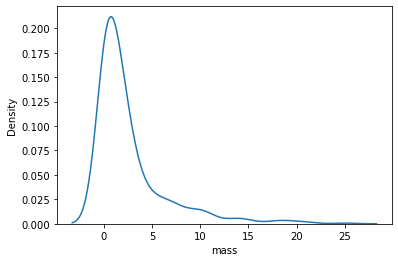

In [16]:
sns.kdeplot(data=df1,x='mass')

# Transformation
- log
- cbrt
- sqrt

In [17]:
df1['log_mass']=np.log(df1['mass'])

In [18]:
df1.head()

,method,number,orbital_period,mass,distance,year,log_mass
0,Radial Velocity,1,269.300,7.10,77.40,2006,1.960095
1,Radial Velocity,1,874.774,2.21,56.95,2008,0.792993
2,Radial Velocity,1,763.000,2.60,19.84,2011,0.955511
3,Radial Velocity,1,326.030,19.40,110.62,2007,2.965273
4,Radial Velocity,1,516.220,10.50,119.47,2009,2.351375


<AxesSubplot:xlabel='log_mass', ylabel='Density'>

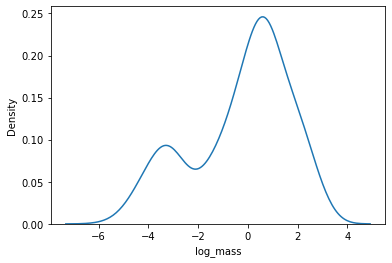

In [19]:
sns.kdeplot(data=df1,x='log_mass')

In [20]:
df1['S_mass']=np.sqrt(df1['mass'])

In [21]:
df1.head()

,method,number,orbital_period,mass,distance,year,log_mass,S_mass
0,Radial Velocity,1,269.300,7.10,77.40,2006,1.960095,2.664583
1,Radial Velocity,1,874.774,2.21,56.95,2008,0.792993,1.486607
2,Radial Velocity,1,763.000,2.60,19.84,2011,0.955511,1.612452
3,Radial Velocity,1,326.030,19.40,110.62,2007,2.965273,4.404543
4,Radial Velocity,1,516.220,10.50,119.47,2009,2.351375,3.240370


<AxesSubplot:xlabel='S_mass', ylabel='Density'>

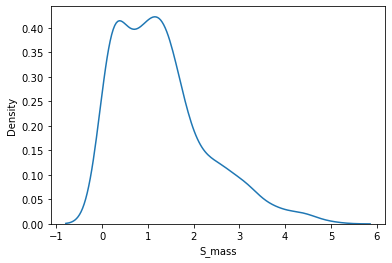

In [22]:
sns.kdeplot(data=df1,x='S_mass')

# Outlier treatment

In [23]:
data=sns.load_dataset('tips')

In [24]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill'>

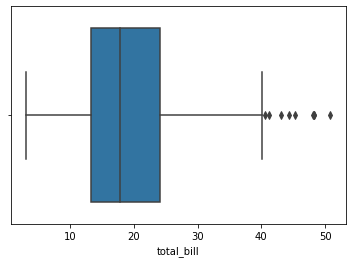

In [25]:
sns.boxplot(data=data,x='total_bill')

In [26]:
Q1=data['total_bill'].quantile(0.25)

In [27]:
Q1

13.3475

In [28]:
Q3=data['total_bill'].quantile(0.75)

In [29]:
Q3

24.127499999999998

In [30]:
IQR = Q3-Q1

In [31]:
IQR

10.779999999999998

In [32]:
LL=Q1-1.5*IQR

In [33]:
LL

-2.8224999999999945

In [34]:
UL=Q3+1.5*IQR

In [35]:
UL

40.29749999999999

In [36]:
data[data['total_bill']<LL]

,total_bill,tip,sex,smoker,day,time,size


In [37]:
data[data['total_bill']>UL]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [38]:
data[(data['total_bill']<LL) | (data['total_bill']>UL)]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [39]:
data1=data[(data['total_bill']>LL) & (data['total_bill']<UL)]

<AxesSubplot:xlabel='total_bill'>

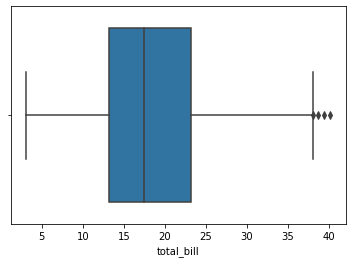

In [40]:
sns.boxplot(data=data1,x='total_bill')

In [41]:
from scipy.stats import zscore

In [42]:
data1['tip1']=zscore(data1['tip'])

C:\Users\Win10\AppData\Local\Temp\ipykernel_3688\1237851605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['tip1']=zscore(data1['tip'])


In [43]:
data1.head()

,total_bill,tip,sex,smoker,day,time,size,tip1
0,16.99,1.01,Female,No,Sun,Dinner,2,-1.546546
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.015084
2,21.01,3.50,Male,No,Sun,Dinner,3,0.489363
3,23.68,3.31,Male,No,Sun,Dinner,2,0.334012
4,24.59,3.61,Female,No,Sun,Dinner,4,0.579303


<AxesSubplot:xlabel='tip'>

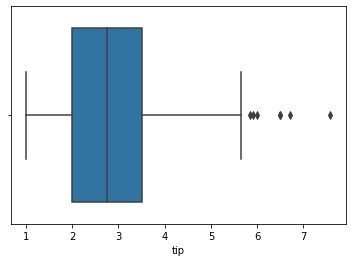

In [44]:
sns.boxplot(data=data1,x='tip')sns.boxplot(data=data1,x='tip')

<AxesSubplot:xlabel='tip1'>

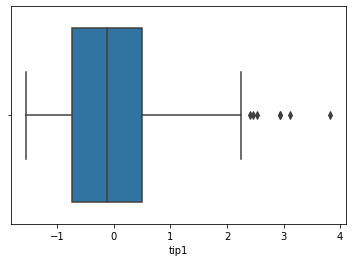

In [45]:
sns.boxplot(data=data1,x='tip1')

In [50]:
data1[data1['tip1']<-3]

,total_bill,tip,sex,smoker,day,time,size,tip1


In [49]:
data1[data1['tip1']>3]

,total_bill,tip,sex,smoker,day,time,size,tip1
23,39.42,7.58,Male,No,Sat,Dinner,4,3.825310
141,34.30,6.70,Male,No,Thur,Lunch,6,3.105792


In [52]:
data1[(data1['tip']<-3)|(data1['tip1']>3)]

,total_bill,tip,sex,smoker,day,time,size,tip1
23,39.42,7.58,Male,No,Sat,Dinner,4,3.825310
141,34.30,6.70,Male,No,Thur,Lunch,6,3.105792


In [54]:
data2=data1[(data1['tip']>-3)&(data1['tip1']<3)]

<AxesSubplot:xlabel='tip1'>

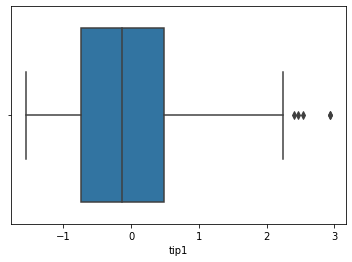

In [56]:
sns.boxplot(data=data2,x='tip1')